## Survival Analysis

### Introduction
#### Survival analysis or time-to-event analysis refers to the set of statistical analyses that takes a series of observations to estimate the time it takes for an event of interest to occur.
#### In this case, the event of interest is that a patient will eventually progress to the chronic kidney disease (CKD). The typical questions include:
#### (1) What is the impact of certain clinical measurements and characteristics on the patient's CKD progression?
#### (2) What is the probability that a patient survives a specific period before CKD?
#### (3) Are there differences in the CKD progression between groups of patients?

### Objectives
#### (1) Kaplan-Meier plots to visualize survival curves;
#### (2) Nelson-Aalen plots to visualize the cumulative hazard;
#### (3) Log-rank test to compare the survival curves of two or more groups;
#### (4) Cox proportional hazards regression to find out the effect of different variables on survival;
#### (5) Time-varying Cox regression.

In [131]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
from lifelines import CoxTimeVaryingFitter

In [132]:
# Read the dataset
data = pd.read_csv("CKD_fullmergedata.csv")
data.head()

,id,creatinine,time,DBP,glucose,HGB,ldl,SBP,race,gender,age,stage,drug,dosage,start_day,end_day
0,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,atorvastatin,10.0,19.0,109.0
1,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,atorvastatin,10.0,117.0,207.0
2,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,19.0,289.0
3,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,403.0,493.0
4,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,587.0,677.0


#### Statistical Information of the dataset
##### It gives me some statistical information such as the total number of rows, mean, standard deviation, 
##### minimum value, 25th percentile, 50th percentile, 75th percentile, and maximum value for each column.
##### I also get a general idea about how this CKD data is distributed.

In [133]:
# Basic statistical information
data.describe()

,id,creatinine,time,DBP,glucose,HGB,ldl,SBP,age,stage,dosage,start_day,end_day
count,10650.000000,10650.000000,10650.000000,2756.000000,7184.000000,5801.000000,7461.000000,2739.000000,10650.000000,10650.000000,10516.000000,10516.000000,10516.000000
mean,145.355962,1.335570,292.371362,79.617028,6.847756,13.795684,83.674863,134.087693,70.603474,0.389953,288.028314,292.696367,371.147585
std,88.530181,0.356911,223.598705,11.121949,1.586894,1.639288,27.103001,14.784700,9.357912,0.487762,495.847494,191.031722,190.548367
min,0.000000,0.240000,0.000000,48.380000,3.970000,9.100000,26.100000,92.690000,46.000000,0.000000,2.000000,-78.000000,-4.000000
25%,67.000000,1.090000,84.000000,71.810000,5.650000,12.670000,63.880000,124.210000,64.000000,0.000000,25.000000,127.000000,207.000000
50%,141.000000,1.290000,286.000000,79.050000,6.560000,13.850000,80.250000,132.960000,72.000000,0.000000,50.000000,290.000000,376.000000
75%,226.000000,1.550000,491.000000,87.060000,7.700000,14.980000,98.880000,144.150000,79.000000,1.000000,320.000000,452.000000,535.000000
max,299.000000,3.020000,699.000000,112.930000,15.160000,18.090000,198.590000,179.450000,86.000000,1.000000,2550.000000,691.000000,698.000000


<AxesSubplot:>

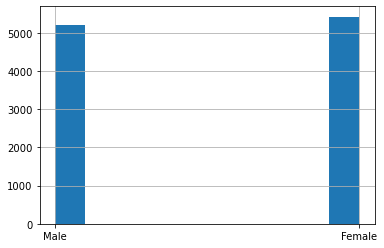

In [70]:
# Find out sex distribution using histogram
data["gender"].hist()

<AxesSubplot:>

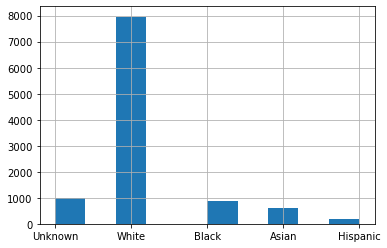

In [71]:
# Find out race distribution using histogram
data["race"].hist()

### (1) Kaplan-Meier Estimator

In [72]:
# Create an object for KaplanMeierFitter
kmf = KaplanMeierFitter()

In [73]:
# Fitting the data into object
# The 1st argument accepts an array or pd.Series of individual survival times
# Event of interest:
## stage=1: patients with CKD progression; stage=0: no CKD progression

kmf.fit(durations = data["time"],event_observed = data["stage"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10650 total observations, 6497 right-censored observations>

In [74]:
# Event table indicates if the event of interest occured:
## Event_at: it stores the value of the timeline of the dataset.
## At_risk: it stores the number of current patients.
## Entrance: it stores the value of new patients in a given timeline.
## Censored: the ultimate goal is to find the probability for a patient to progress to CKD.
## Observed: the number of patients that progressed to CKD eventually.
## Removed = Observed + Censored

kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,2209,816,1393,10650,10650
1,71,40,31,0,8441
2,25,4,21,0,8370
3,16,0,16,0,8345
4,9,9,0,0,8329
...,...,...,...,...,...
694,22,0,22,0,46
696,8,0,8,0,24
697,9,4,5,0,16


In [75]:
# Predict the survival probability
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.923380
1.0,0.919005
2.0,0.918565
3.0,0.918565
4.0,0.917573
...,...
694.0,0.111051
696.0,0.111051
697.0,0.083288


In [76]:
# Provide the number of days where on average 50% of patients progressed to CKD.
# From the below code, it showed that on average, a patient experienced 558 days to progress to CKD.
kmf.median_survival_time_

558.0

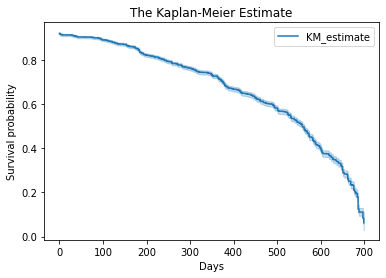

In [134]:
# Plot the graph
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Survival probability")
plt.xlabel("Days")
plt.show()

In [78]:
# Confidence interval
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.918166,0.928275
1.0,0.913635,0.924054
2.0,0.913181,0.923630
3.0,0.913181,0.923630
4.0,0.912154,0.922672
...,...,...
694.0,0.093931,0.129744
696.0,0.093931,0.129744
697.0,0.058811,0.113018
698.0,0.058811,0.113018


In [79]:
# Probability of a patient progressed to CKD
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.076620
1.0,0.080995
2.0,0.081435
3.0,0.081435
4.0,0.082427
...,...
694.0,0.888949
696.0,0.888949
697.0,0.916712


Text(0.5, 0, 'Days')

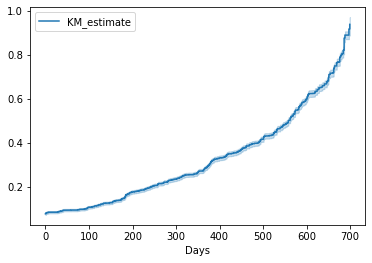

In [135]:
# Plot the cumulative density
## As the number of days increases, the probability of a patient progressed to CKD also increases.
kmf.plot_cumulative_density()
plt.xlabel("Days")

### (2) Nelson-Aalen: estimating hazard rates

In [81]:
# Estimating hazard rates using Nelson-Aalen
# Fitting the data
naf = NelsonAalenFitter()
naf.fit(data["time"],event_observed = data["stage"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 10650 total observations, 6497 right-censored observations>

In [82]:
# Cumulative hazard
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.079710
1.0,0.084460
2.0,0.084938
3.0,0.084938
4.0,0.086019
...,...
694.0,2.194387
696.0,2.194387
697.0,2.471905


<AxesSubplot:xlabel='timeline'>

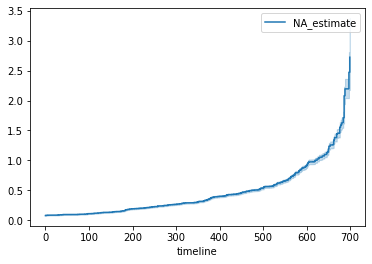

In [83]:
# Plot the cumulative_hazard
naf.plot_cumulative_hazard()

In [84]:
# Predict the value of a certain point
naf.predict(27)

0.08782606239735458

### (3) Kaplan-Meier and Nelson-Aalen Estimator by gender groups

In [85]:
# Kaplan-Meier Estimator with gender groups
## kmf_m: male data
## kmf_f: female data

kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()

In [86]:
# Divide data into two gender groups
Male = data.query("gender == 'Male'")
Female = data.query("gender == 'Female'")

In [87]:
# Fit data into the objects
kmf_m.fit(durations = Male["time"],event_observed = Male["stage"],label = "Male")
kmf_f.fit(durations = Female["time"],event_observed = Female["stage"],label = "Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 5428 total observations, 3971 right-censored observations>

In [88]:
# Generate event_tables (Male)
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,1059,539,520,5222,5222
1,59,40,19,0,4163
2,20,0,20,0,4104
4,7,7,0,0,4084
5,7,0,7,0,4077
...,...,...,...,...,...
688,11,11,0,0,33
694,7,0,7,0,22
696,8,0,8,0,15


In [89]:
# Generate event_tables (Female)
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,1150,277,873,5428,5428
1,12,0,12,0,4278
2,5,4,1,0,4266
3,16,0,16,0,4261
4,2,2,0,0,4245
...,...,...,...,...,...
689,20,0,20,0,62
690,18,0,18,0,42
694,15,0,15,0,24


In [90]:
# Predict survival probabilities (Male)
kmf_m.predict(30)

0.8822767489661645

In [91]:
# Predict survival probabilities (Female)
kmf_f.predict(30)

0.9462908957259408

In [92]:
# Get the complete list of survival probabilities (Male)
kmf_m.survival_function_

,Male
timeline,
0.0,0.896783
1.0,0.888166
2.0,0.888166
4.0,0.886644
5.0,0.886644
...,...
688.0,0.043527
694.0,0.043527
696.0,0.043527


In [93]:
# Get the complete list of survival probabilities (Female)
kmf_f.survival_function_

,Female
timeline,
0.0,0.948968
1.0,0.948968
2.0,0.948079
3.0,0.948079
4.0,0.947632
...,...
689.0,0.219629
690.0,0.219629
694.0,0.219629


Text(0.5, 1.0, 'Kaplan-Meier fitter theory')

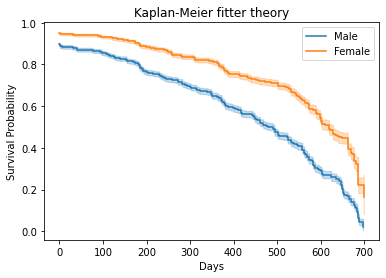

In [136]:
# Plot the survival function for both gender
kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier fitter theory")

In [95]:
# Cumulitive density (Male)
kmf_m.cumulative_density_

,Male
timeline,
0.0,0.103217
1.0,0.111834
2.0,0.111834
4.0,0.113356
5.0,0.113356
...,...
688.0,0.956473
694.0,0.956473
696.0,0.956473


In [96]:
# Cumulitive density (Female)
kmf_f.cumulative_density_

,Female
timeline,
0.0,0.051032
1.0,0.051032
2.0,0.051921
3.0,0.051921
4.0,0.052368
...,...
689.0,0.780371
690.0,0.780371
694.0,0.780371


Text(0.5, 0, 'Days')

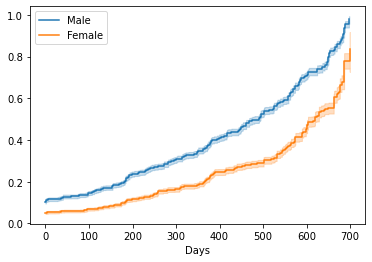

In [137]:
# Plot the cumulative density for both gender
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()
plt.xlabel("Days")

In [98]:
# Hazard function
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed = Male["stage"])
naf_f.fit(Female["time"],event_observed = Female["stage"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 5428 total observations, 3971 right-censored observations>

In [99]:
# Cumulative hazard (Male)
naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.108931
1.0,0.118584
2.0,0.118584
4.0,0.120300
5.0,0.120300
...,...
688.0,3.118243
694.0,3.118243
696.0,3.118243


In [100]:
# Cumulative hazard (Female)
naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.052375
1.0,0.052375
2.0,0.053313
3.0,0.053313
4.0,0.053784
...,...
689.0,1.512068
690.0,1.512068
694.0,1.512068


Text(0.5, 0, 'Days')

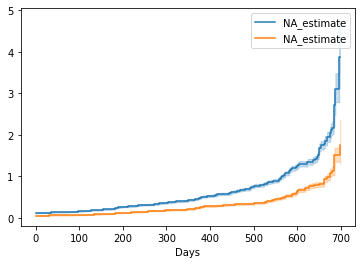

In [138]:
# Plot the data
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()
plt.xlabel("Days")

In [102]:
# Log-rank test
T = Male["time"]
E = Male["stage"]
t = Female["time"]
e = Female["stage"]

results = logrank_test(T,t,event_observed_A=E,event_observed_B=e)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         485.58 <0.005    355.06

### (4) Kaplan-Meier and Nelson-Aalen Estimator by race groups

In [103]:
# Divide data into different race groups
Unknown = data.query("race == 'Unknown'")
White = data.query("race == 'White'")
Black = data.query("race == 'Black'")
Asian = data.query("race == 'Asian'")
Hispanic = data.query("race == 'Hispanic'")

In [104]:
# Kaplan-Meier fitter based on different race groups
kmf_u = KaplanMeierFitter()
kmf_w = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()
kmf_a = KaplanMeierFitter()
kmf_h = KaplanMeierFitter()

In [105]:
# Fit data into the objects
kmf_u.fit(durations = Unknown["time"],event_observed = Unknown["stage"],label="Unknown")
kmf_w.fit(durations = White["time"],event_observed = White["stage"],label="White")
kmf_b.fit(durations = Black["time"],event_observed = Black["stage"],label="Black")
kmf_a.fit(durations = Asian["time"],event_observed = Asian["stage"],label="Asian")
kmf_h.fit(durations = Hispanic["time"],event_observed = Hispanic["stage"],label="Hispanic")

<lifelines.KaplanMeierFitter:"Hispanic", fitted with 193 total observations, 149 right-censored observations>

In [106]:
# Generate event_tables (Unknown)
kmf_u.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,187,92,95,1000,1000
3,15,0,15,0,813
4,7,7,0,0,798
18,9,0,9,0,791
58,2,2,0,0,782
...,...,...,...,...,...
649,7,0,7,0,39
673,1,0,1,0,32
676,12,12,0,0,31


In [107]:
# Generate event_tables (White)
kmf_w.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,1633,619,1014,7958,7958
1,57,31,26,0,6325
2,24,4,20,0,6268
4,2,2,0,0,6244
5,7,0,7,0,6242
...,...,...,...,...,...
694,22,0,22,0,46
696,8,0,8,0,24
697,9,4,5,0,16


In [108]:
# Generate event_tables (Black)
kmf_b.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,189,58,131,882,882
1,14,9,5,0,693
2,1,0,1,0,679
3,1,0,1,0,678
7,9,9,0,0,677
...,...,...,...,...,...
651,7,7,0,0,42
661,11,0,11,0,35
681,4,4,0,0,24


In [109]:
# Generate event_tables (Asian)
kmf_a.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,153,36,117,617,617
6,5,5,0,0,464
83,16,0,16,0,459
86,4,0,4,0,443
93,14,0,14,0,439
102,4,0,4,0,425
134,7,0,7,0,421
135,10,0,10,0,414
148,11,0,11,0,404


In [110]:
# Generate event_tables (Hispanic)
kmf_h.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,47,11,36,193,193
8,5,0,5,0,146
170,1,1,0,0,141
184,9,9,0,0,140
187,5,0,5,0,131
188,1,1,0,0,126
189,6,0,6,0,125
190,10,0,10,0,119
202,15,0,15,0,109


In [111]:
# Get the complete list of survival probability (Unknown)
kmf_u.survival_function_

,Unknown
timeline,
0.0,0.908000
3.0,0.908000
4.0,0.900035
18.0,0.900035
58.0,0.897733
...,...
649.0,0.155195
673.0,0.155195
676.0,0.095120


In [112]:
# Get the complete list of survival probability (White)
kmf_w.survival_function_

,White
timeline,
0.0,0.922217
1.0,0.917697
2.0,0.917111
4.0,0.916817
5.0,0.916817
...,...
694.0,0.125909
696.0,0.125909
697.0,0.094432


In [113]:
# Get the complete list of survival probability (Black)
kmf_b.survival_function_

,Black
timeline,
0.0,0.934240
1.0,0.922107
2.0,0.922107
3.0,0.922107
7.0,0.909849
...,...
651.0,0.392276
661.0,0.392276
681.0,0.326897


In [114]:
# Get the complete list of survival probability (Asian)
kmf_a.survival_function_

,Asian
timeline,
0.0,0.941653
6.0,0.931506
83.0,0.931506
86.0,0.931506
93.0,0.931506
102.0,0.931506
134.0,0.931506
135.0,0.931506
148.0,0.931506


In [115]:
# Get the complete list of survival probability (Hispanic)
kmf_h.survival_function_

,Hispanic
timeline,
0.0,0.943005
8.0,0.943005
170.0,0.936317
184.0,0.876125
187.0,0.876125
188.0,0.869172
189.0,0.869172
190.0,0.869172
202.0,0.869172


Text(0.5, 1.0, 'Kaplan-Meier fitter theory')

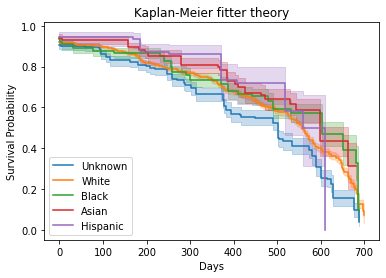

In [139]:
# Plot the survival function
kmf_u.plot()
kmf_w.plot()
kmf_b.plot()
kmf_a.plot()
kmf_h.plot()

plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier fitter theory")

In [117]:
# Cumulitive density (Unknown)
kmf_u.cumulative_density_

,Unknown
timeline,
0.0,0.092000
3.0,0.092000
4.0,0.099965
18.0,0.099965
58.0,0.102267
...,...
649.0,0.844805
673.0,0.844805
676.0,0.904880


In [118]:
# Cumulitive density (White)
kmf_w.cumulative_density_

,White
timeline,
0.0,0.077783
1.0,0.082303
2.0,0.082889
4.0,0.083183
5.0,0.083183
...,...
694.0,0.874091
696.0,0.874091
697.0,0.905568


In [119]:
# Cumulitive density (Black)
kmf_b.cumulative_density_

,Black
timeline,
0.0,0.065760
1.0,0.077893
2.0,0.077893
3.0,0.077893
7.0,0.090151
...,...
651.0,0.607724
661.0,0.607724
681.0,0.673103


In [120]:
# Cumulitive density (Asian)
kmf_a.cumulative_density_

,Asian
timeline,
0.0,0.058347
6.0,0.068494
83.0,0.068494
86.0,0.068494
93.0,0.068494
102.0,0.068494
134.0,0.068494
135.0,0.068494
148.0,0.068494


In [121]:
# Cumulitive density (Hispanic)
kmf_h.cumulative_density_

,Hispanic
timeline,
0.0,0.056995
8.0,0.056995
170.0,0.063683
184.0,0.123875
187.0,0.123875
188.0,0.130828
189.0,0.130828
190.0,0.130828
202.0,0.130828


Text(0.5, 0, 'Days')

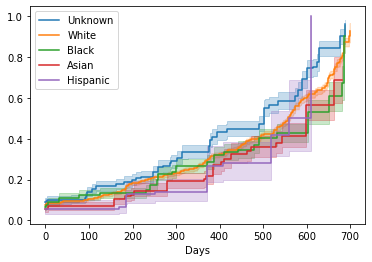

In [140]:
# Plot the cumulative density for all race groups
kmf_u.plot_cumulative_density()
kmf_w.plot_cumulative_density()
kmf_b.plot_cumulative_density()
kmf_a.plot_cumulative_density()
kmf_h.plot_cumulative_density()
plt.xlabel("Days")

In [123]:
# Hazard function
naf_u = NelsonAalenFitter()
naf_w = NelsonAalenFitter()
naf_b = NelsonAalenFitter()
naf_a = NelsonAalenFitter()
naf_h = NelsonAalenFitter()

naf_u.fit(Unknown["time"],event_observed = Unknown["stage"])
naf_w.fit(White["time"],event_observed = White["stage"])
naf_b.fit(Black["time"],event_observed = Black["stage"])
naf_a.fit(Asian["time"],event_observed = Asian["stage"])
naf_h.fit(Hispanic["time"],event_observed = Hispanic["stage"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 193 total observations, 149 right-censored observations>

In [124]:
# Cumulative hazard (Unknown)
naf_u.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.096460
3.0,0.096460
4.0,0.105265
18.0,0.105265
58.0,0.107825
...,...
649.0,1.855249
673.0,1.855249
676.0,2.334754


In [125]:
# Cumulative hazard (White)
naf_w.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.080970
1.0,0.085883
2.0,0.086521
4.0,0.086841
5.0,0.086841
...,...
694.0,2.068669
696.0,2.068669
697.0,2.346187


In [126]:
# Cumulative hazard (Black)
naf_b.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.067982
1.0,0.081044
2.0,0.081044
3.0,0.081044
7.0,0.094417
...,...
651.0,0.931371
661.0,0.931371
681.0,1.109590


In [127]:
# Cumulative hazard (Asian)
naf_a.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.060068
6.0,0.070891
83.0,0.070891
86.0,0.070891
93.0,0.070891
102.0,0.070891
134.0,0.070891
135.0,0.070891
148.0,0.070891


In [128]:
# Cumulative hazard (Hispanic)
naf_h.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.058527
8.0,0.058527
170.0,0.065619
184.0,0.131820
187.0,0.131820
188.0,0.139756
189.0,0.139756
190.0,0.139756
202.0,0.139756


Text(0.5, 0, 'Days')

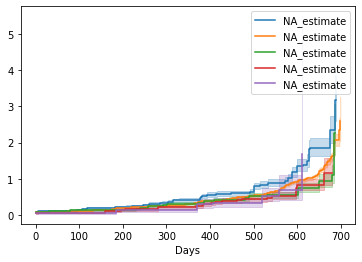

In [141]:
# Plot the data
naf_u.plot_cumulative_hazard()
naf_w.plot_cumulative_hazard()
naf_b.plot_cumulative_hazard()
naf_a.plot_cumulative_hazard()
naf_h.plot_cumulative_hazard()
plt.xlabel("Days")

### (5) Cox regression hazard model

In [142]:
# Cox proportional hazard model
# Reload the original dataset
# Must delete rows that contain null values
data = pd.read_csv("CKD_fullmergedata.csv")
data = data.dropna(subset=['id','creatinine','time','DBP','glucose','HGB','ldl','SBP','race','gender','age','stage','drug','dosage','start_day','end_day'])
data.head()

,id,creatinine,time,DBP,glucose,HGB,ldl,SBP,race,gender,age,stage,drug,dosage,start_day,end_day
0,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,atorvastatin,10.0,19.0,109.0
1,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,atorvastatin,10.0,117.0,207.0
2,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,19.0,289.0
3,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,403.0,493.0
4,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,587.0,677.0


In [143]:
# Create an object for KapanMeierFitter
kmf = KaplanMeierFitter()

In [144]:
# Fit the values
kmf.fit(durations = data["time"], event_observed = data["stage"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 2305 total observations, 1442 right-censored observations>

In [145]:
# Event table
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,2181,807,1374,2305,2305
182,15,15,0,0,124
231,5,5,0,0,109
239,1,0,1,0,104
364,10,7,3,0,103
367,16,0,16,0,93
496,12,0,12,0,77
536,15,0,15,0,65
539,10,10,0,0,50


In [146]:
data = data[['creatinine','time','DBP','glucose','HGB','ldl','SBP','age','stage','dosage','start_day','end_day']]

In [147]:
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='stage')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2305 total observations, 1442 right-censored observations>
             duration col = 'time'
                event col = 'stage'
      baseline estimation = breslow
   number of observations = 2305
number of events observed = 863
   partial log-likelihood = -6215.08
         time fit was run = 2021-03-30 05:55:50 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
creatinine  -0.56       0.57       0.11            -0.77            -0.34                 0.46                 0.71
DBP          0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
glucose      0.04       1.04       0.02            -0.00             0.09                 1.00                 1.09
HGB         -0.19       0.83       0.02            -0.24            -0.15                 0.79                 0.86
ldl         -0.01       1.00       0.00            -0.01            -0.00                 0.99                 1.00
SBP         -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
age         -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
dosage       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
start_day    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
end_day     -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

               z      p   -log2(p)
covariate                         
creatinine -5.14 <0.005      21.77
DBP         0.39   0.70       0.52
glucose     1.92   0.06       4.18
HGB        -8.32 <0.005      53.34
ldl        -3.63 <0.005      11.77
SBP        -2.80   0.01       7.62
age        -3.30 <0.005      10.03
dosage      3.24 <0.005       9.71
start_day   2.61   0.01       6.78
end_day    -2.92 <0.005       8.15
---
Concordance = 0.66
Partial AIC = 12450.17
log-likelihood ratio test = 155.38 on 10 df
-log2(p) of ll-ratio test = 91.47

<AxesSubplot:xlabel='log(HR) (95% CI)'>

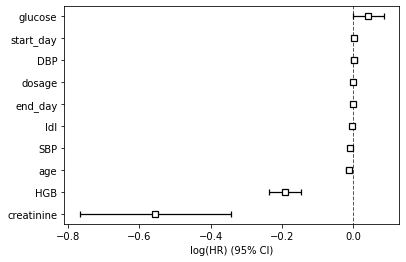

In [148]:
# Plot cph
cph.plot()

Text(0.5, 0, 'Days')

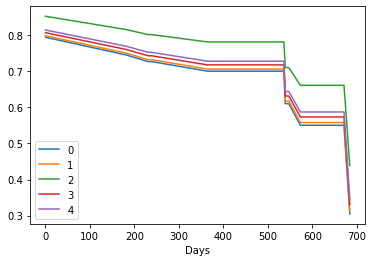

In [149]:
d_data = data.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()
plt.xlabel("Days")

In [150]:
# Find out median time to event for timeline
CTE = kmf.conditional_time_to_event_

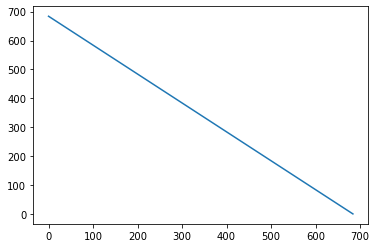

In [151]:
plt.plot(CTE)

### (6) Time-varying Cox regression

In [152]:
# Time-varying Cox regression
data = pd.read_csv("CKD_fullmergedata.csv")
data = data.dropna(subset=['id','creatinine','time','DBP','glucose','HGB','ldl','SBP','race','gender','age','stage','drug','dosage','start_day','end_day'])
data.head()

,id,creatinine,time,DBP,glucose,HGB,ldl,SBP,race,gender,age,stage,drug,dosage,start_day,end_day
0,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,atorvastatin,10.0,19.0,109.0
1,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,atorvastatin,10.0,117.0,207.0
2,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,19.0,289.0
3,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,403.0,493.0
4,0,1.29,0,95.32,6.24,13.51,161.49,134.11,Unknown,Male,70,1,losartan,100.0,587.0,677.0


In [153]:
data = data[['creatinine','time','DBP','glucose','HGB','ldl','SBP','age','stage','dosage','start_day','end_day']]

In [155]:
# Fit the values
cox_tv = CoxTimeVaryingFitter()
cox_tv.fit(data,event_col="stage",start_col="start_day",stop_col="end_day",show_progress=True,step_size=0.1)
cox_tv.print_summary()

/opt/anaconda3/lib/python3.8/site-packages/lifelines/utils/__init__.py:1099: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  problem_columns = (censors_only | deaths_only).difference(total).tolist()


Iteration 22: norm_delta = 0.00000, step_size = 1.00000, ll = -4710.23369, newton_decrement = 0.00000, seconds_since_start = 3.7Convergence completed after 22 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 2305 periods, 2305 subjects, 863 events>
         event col = 'stage'
number of subjects = 2305
 number of periods = 2305
  number of events = 863
partial log-likelihood = -4710.23
  time fit was run = 2021-03-30 05:56:25 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
creatinine  -0.54       0.58       0.11            -0.76            -0.32                 0.47                 0.73
time        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DBP          0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
glucose      0.02       1.02       0.02            -0.03             0.06                 0.97                 1.06
HGB         -0.16       0.85       0.02            -0.21            -0.12                 0.81                 0.89
ldl         -0.00       1.00       0.00            -0.01            -0.00                 0.99                 1.00
SBP         -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
age         -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
dosage       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00

               z      p   -log2(p)
covariate                         
creatinine -4.74 <0.005      18.81
time       -0.02   0.99       0.02
DBP         0.85   0.39       1.34
glucose     0.72   0.47       1.08
HGB        -6.80 <0.005      36.46
ldl        -2.25   0.02       5.36
SBP        -2.42   0.02       6.03
age        -3.28 <0.005       9.90
dosage      3.16 <0.005       9.32
---
Partial AIC = 9438.47
log-likelihood ratio test = 111.28 on 9 df
-log2(p) of ll-ratio test = 63.43

<AxesSubplot:xlabel='log(HR) (95% CI)'>

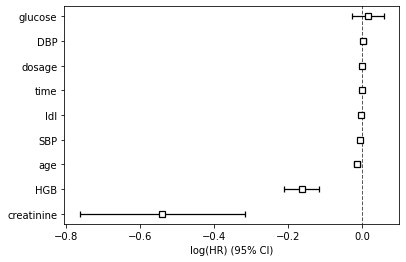

In [156]:
# Plot cox_tv
cox_tv.plot()